# Geoinformática - Práctica 10
## Introducción a la Regionalización

El objetivo de esta práctica es familiarizarse con el concepto de _[Regionalización Homogénea](http://ri.uaemex.mx/bitstream/handle/20.500.11799/70948/secme-28748_1.pdf;jsessionid=B355B30D28322C48785501376290E0C3?sequence=1)_. Para esto, se trabajarán con datos de la Zona Metropolitana del Valle de México (ZMVM).

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd

### Importando Datos

En primer lugar, y como ya se ha realizado anteriormente, se utilizará la librería `geopandas` para importar la información de un archivo tipo `ShapeFile`, utilizando la secuncia de comandos ya trabajada; en este caso, se importaran todos los municipios correspondientes a la ZMVM:

In [2]:
municipios = gpd.read_file('data/muns_zmvm.shp')  # Importar .shp
municipios.head()                                 # Observar los datos

,gid,__gid,cvegeo,pob,sum,comercio,servicios,ocio,nombre,entropia,geometry
0,1,2,09003,620416.0,237535.0,15306.0,3963.0,388.0,Coyoacn,-0.235600,"POLYGON ((484929.1845920058 2140362.452447552,..."
1,2,3,15002,136558.0,101221.0,8722.0,1024.0,178.0,Acolman,-0.231074,"POLYGON ((511067.0957797423 2174738.123246821,..."
2,3,4,09004,186391.0,88111.0,5325.0,1031.0,130.0,Cuajimalpa de Morelos,-0.217374,"POLYGON ((472976.7377409345 2145231.648127011,..."
3,4,5,09005,1185770.0,480458.0,42921.0,6966.0,872.0,Gustavo A. Madero,-0.230393,"POLYGON ((487636.7401871994 2166181.553336697,..."
4,5,6,09006,384326.0,198208.0,19553.0,2965.0,383.0,Iztacalco,-0.224145,"POLYGON ((494143.4423519243 2147538.450303035,..."


En este `GeoDataFrame` se encuentran contenidas las siguientes columnas:
* `pob` - Población Total del Municipio
* `sum` - Número Total de Viviendas
* `comercio` - Número de establecimientos dedicados al Comercio
* `servicios` - Número de establecimientos dedicados a ofrecer Servicios (Escuelas, Hospitales, etc.)
* `ocio` - Número de establecimientos donde se realizan actividades de ocio (Cines, Parques, etc.)
* `nombre` - Nombre del Municipio
* `entropía` - Índice de Mezcla de Tipos de Uso de Suelo; a menor índice, mayor mezcla. Se trata del mismo índice utilizado en la [Práctica del Unidad de Área Modificable (MUAP)](../08_muap/08_muap.html)

Resulta de utilidad graficar el `GeoDataFrame` para conocer su apariencia geográfica, esto realizándolo a través de la función `.plot()` de la librería `matplotlib`:

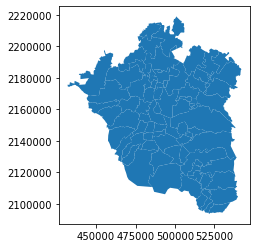

In [16]:
municipios.plot()

Así mismo, podría construirse un Mapa de Coropletas para estudiar, de primera instancia, las variables contenidas en los datos; por ejemplo, podría construirse uno a partir de la población contenida en cada uno de los municipios, a través de la secuencia de comandas que ya se ha practicado anteriormente:

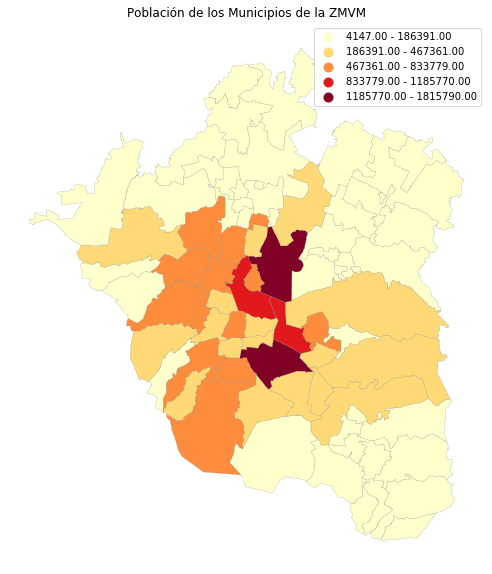

In [14]:
# Preparar la figura y sus filas
fig, filas = plt.subplots(1 , figsize = (10,10))

# Graficar una Coropleta dividia con Fisher-Jenks, con su leyenda
municipios.plot(column = 'pob' , scheme = 'fisher_jenks' , legend = True , ax = filas , cmap = 'YlOrRd' , edgecolor = 'grey', linewidth = 0.2)

# Eliminar los ejes
filas.set_axis_off()

# Asignar un título
filas.set_title('Población de los Municipios de la ZMVM')

# Mostrar el Resultado
plt.show()

A partir del mapa anterior, puede concluirse rápidamente que la mayoría de la población se encuentra concentrada dentro de las alcaldías de la Ciudad de México, mientras que el resto de los municipios de la zona tienen en su mayoría una población pequeña en comparación.

#### Ejercicio Opcional
Utiliza el código anterior para explorar la distribución espacial del resto de las variables contenidas en el `GeoDataFrame`, y responde las preguntas: ¿Cuáles son las diferencias que puedes observar? ¿A qué crees que se deban estas diferencias?

Desde el punto de vista geográfico, y para esta práctica, resulta interesente estudiar si existen procesos a Nivel Local (Contextual) que permitan explicar la distribución espacial de las variables; una forma de responder esta pregunta es a través del concepto de _Regionalización_, esto es, agrupar las unidades espaciales en función de sus características particulares y su ubicación en el espacio.
___
### Regionalización
Para estudiar el modelo de _Regionalización_ , se utilizará la librería de Python llamada `clusterpy`. Al igual que la librería de `haggerstrand` utilizada en la [Práctica de Difusión Espacial](../09_difusionespacial/09_intro.html), ésta no es una librería difundida extensamente como `numpy` o `pandas`, debido a que su última versión estable existió hace tiempo en Python 2.x; sin embargo, existe una versión actualizada para Python 3 que se encuentra de forma local en el repositorio del curso. Como ya se estudió, es posible importar estas librerías locales siempre y cuando se encuentren en la misma carpeta de trabajo:

In [15]:
import clusterpy

ClusterPy: Library of spatially constrained clustering algorithms
Some functions are not available, reason: No module named 'Polygon'
Some functions are not available, reason: No module named 'Polygon'


Como primer ejercicio, se realizará una _Regionalización_ a través de la variable de Población (`pob`), de modo que pueda compararse el resultado del algoritmo con el Mapa de Coropletas realizado anteriormente. Para esto, `clusterpy` necesita de una secuencia de comandos específicos, únicos de la librería, y que se muestran a continuación:

In [23]:
# Importar los datos a 'clusterpy'
layer = clusterpy.importArcData('data/muns_zmvm')

# Generar la regionalización a través del método '.cluster()'
layer.cluster('arisel', ['pob'], 8, wType='rook', inits=10, dissolve=1)

# Exportar el resultado de la regionalización para poder visualizarlo
layer.results[0].exportArcData('data/regiones_1')

# Exportar el .shp original, procesado ya por 'clusterpy', para observer los cambios
layer.exportArcData('data/muns_zmvm_clusterpy')

Loading data/muns_zmvm.dbf
Loading data/muns_zmvm.shp
Done
Getting variables
Variables successfully extracted
Running original Arisel algorithm
Number of areas:  75
Number of regions:  8
INITIAL SOLUTION:  [1, 0, 4, 5, 4, 2, 1, 0, 7, 3, 4, 6, 0, 6, 7, 7, 7, 5, 6, 3, 5, 0, 3, 0, 0, 6, 7, 0, 6, 0, 0, 6, 0, 0, 7, 6, 0, 0, 4, 0, 0, 3, 3, 0, 0, 3, 1, 6, 0, 4, 6, 1, 6, 7, 0, 4, 4, 4, 3, 0, 0, 0, 3, 7, 0, 3, 6, 0, 0, 6, 0, 0, 0, 0, 7] 
INITIAL OF:  1301085525355.8804
FINAL SOLUTION:  [1, 0, 1, 5, 1, 2, 1, 0, 1, 3, 1, 6, 0, 6, 1, 0, 7, 5, 6, 4, 5, 0, 3, 0, 0, 6, 1, 0, 6, 0, 0, 6, 0, 0, 0, 6, 0, 0, 1, 0, 0, 4, 3, 0, 0, 3, 1, 6, 0, 1, 6, 1, 6, 1, 0, 1, 1, 1, 3, 0, 0, 0, 3, 1, 0, 3, 6, 0, 0, 6, 0, 0, 0, 0, 1] 
FINAL OF:  1049957206383.7885
Adding variables
Done
Dissolving lines
Done
Writing ESRI files
Writing DBF file
Done
ESRI files created
Writing ESRI files
Writing DBF file
Done
ESRI files created


A continuación, se explican cada una de las líneas utilizadas; toma en cuenta que todo este proceso se deriva de cómo trabaja en particular la librería `clusterpy`:
* Primero, en la Línea 2, se importa el `ShapeFile` de trabajo a través de `clusterpy`. Esto se debe a que la importación anterior, realizada con `geopandas`, no es compatible con `clusterpy`; forzosamente se necesita utilizar la función `.importArcData()`, derivada de `clusterpy`, para que ésta pueda entender los datos.
* Después, en la Línea 5, se ejecuta formalmente el algoritmo de regionalización a través de

In [24]:
regionalizacion = gpd.read_file('data/regiones_1.shp')
regionalizacion.head()

,ID,geometry
0,0.0,"POLYGON ((457551.2194000999 2140300.166866862,..."
1,1.0,"POLYGON ((431878.4600198126 2175615.220086931,..."
2,2.0,(POLYGON ((481425.6450883293 2159407.759392938...
3,3.0,"POLYGON ((493896.3149089404 2145168.182700506,..."
4,4.0,"POLYGON ((444002.3953645987 2167119.54836712, ..."
